Brain tumor segmentation with K-means++ Clustering and morphology operations

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

import seaborn as sns
import cv2
import tensorflow as tf
from tqdm import tqdm
import os
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
from warnings import filterwarnings

In [61]:
from google.colab import files
uploaded = files.upload()

Saving 11.png to 11 (1).png


In [62]:
img = cv2.imread('11.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

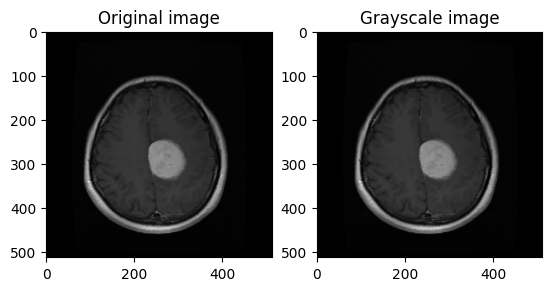

In [63]:
fig, ax = plt.subplots(ncols=2)

ax[0].imshow(img[..., ::-1])  # BGR to RGB
ax[0].set_title('Original image')

ax[1].imshow(gray_img, cmap=plt.cm.gray)
ax[1].set_title('Grayscale image')

plt.show()

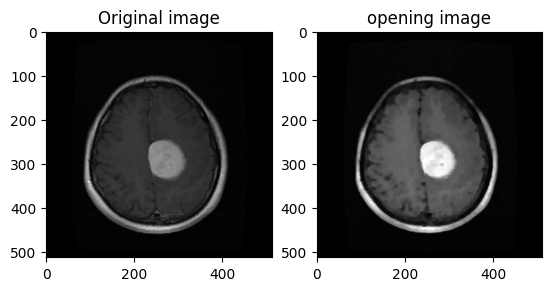

-1

In [64]:
#img = cv2.imread('11.png')
# Python program to demonstrate erosion and
# dilation of images.
import cv2
import numpy as np

# Reading the input image

# Taking a matrix of size 5 as the kernel
kernel = np.ones((5,5), np.uint8)

# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(gray_img, kernel, iterations=2)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=1)

#opening= cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=2)
#cv2.imshow('Input', img)
#cv2.imshow('Erosion', img_erosion)
#cv2.imshow('Dilation', img_dilation)

fig, ax = plt.subplots(ncols=2)

ax[0].imshow(img[..., ::-1])  # BGR to RGB
ax[0].set_title('Original image')

ax[1].imshow(img_dilation, cmap=plt.cm.gray)
ax[1].set_title('opening image')

plt.show()

cv2.waitKey(0)


In [65]:
import cv2
cv2.imwrite('/content/11_prepro.png', img_dilation)

True

k-means

In [66]:
img = cv2.imread("11_prepro.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
br, kl = img.shape[:2]
new_array = img.reshape((-1, 3))

In [67]:
print(new_array)

[[0 0 0]
 [0 0 0]
 [0 0 0]
 ...
 [0 0 0]
 [0 0 0]
 [0 0 0]]


In [69]:
import numpy as np
from scipy.spatial import distance
#====================
#INITIAL MEANS
#===================
c=[]

# ------------------------
# RANDOMLY SELECT 1ST MEAN
# ------------------------
rows = new_array.shape[0]
temp = np.random.randint(1,rows+3) # random integer from uniform dist, range [0,rows+1)
c.append(new_array[temp]) # SET 1ST CENTRE RANDOMLY FROM DATASET



# --------------------------------------------
# ROULETTE WHEEL BASED SELECTION OF "2ND" MEAN
# --------------------------------------------

# compute distance squared from 1st centre
D2=[]
for i in range(rows):
    d=distance.euclidean(c[0],new_array[i])
    D2.append(d*d)

# compute cumulative distnace squared in cumul
cumul=[]
sum_val=0
for i in range(len(D2)):
    sum_val=sum_val+D2[i]
    cumul.append(sum_val)

# probabilities
for i in range(len(cumul)):
    cumul[i]=cumul[i]/sum_val

p = np.random.uniform(0,1)
for i in range(len(cumul)):
    if cumul[i] >= p:
        index=i
        break

c.append(new_array[index]) # SET 2ND MEAN

# --------------------------------------------
# ROULETTE WHEEL BASED SELECTION OF "3RD" MEAN
# --------------------------------------------

# compute shortest distance squared (from both centres)
D2=[]
for i in range(rows):
    d1=distance.euclidean(c[0],new_array[i])
    d2=distance.euclidean(c[1],new_array[i])
    if d1*d1 >= d2*d2:
        D2.append(d2*d2)
    if d2*d2 > d1*d1:
        D2.append(d1*d1)

# compute cumulative distnace squared in cumul
cumul=[]
sum_val=0
for i in range(len(D2)):
    sum_val=sum_val+D2[i]
    cumul.append(sum_val)

# probabilities
for i in range(len(cumul)):
    cumul[i]=cumul[i]/sum_val

p = np.random.uniform(0,1)
for i in range(len(cumul)):
    if cumul[i] >= p:
        index=i
        break

c.append(new_array[index]) # SET 3RD MEAN

# --------------------------------------------
# ROULETTE WHEEL BASED SELECTION OF "4ND" MEAN-------------
# --------------------------------------------

# compute distance squared from 3rd centre
D2=[]
for i in range(rows):
    d1=distance.euclidean(c[0],new_array[i])
    d2=distance.euclidean(c[1],new_array[i])
    d3=distance.euclidean(c[2],new_array[i])
    if d1*d1 >= d2*d2:
        D2.append(d2*d2)
    if d2*d2 > d1*d1:
        D2.append(d1*d1)
    if d2*d2 > d3*d3:
        D2.append(d3*d3)
    if d1*d1 > d3*d3:
        D2.append(d3*d3)

# compute cumulative distnace squared in cumul
cumul=[]
sum_val=0
for i in range(len(D2)):
    sum_val=sum_val+D2[i]
    cumul.append(sum_val)

# probabilities
for i in range(len(cumul)):
    cumul[i]=cumul[i]/sum_val

p = np.random.uniform(0,1)
for i in range(len(cumul)):
    if cumul[i] >= p:
        index=i
        break

c.append(new_array[index]) # SET 4ND MEAN
#############################################################

# --------------------------------------------
# ROULETTE WHEEL BASED SELECTION OF "5ND" MEAN----------------------------------
# --------------------------------------------

# compute distance squared from 4th centre
D2=[]
for i in range(rows):
    d1=distance.euclidean(c[0],new_array[i])
    d2=distance.euclidean(c[1],new_array[i])
    d3=distance.euclidean(c[2],new_array[i])
    d4=distance.euclidean(c[3],new_array[i])
    if d1*d1 >= d2*d2:
        D2.append(d2*d2)
    if d2*d2 > d1*d1:
        D2.append(d1*d1)
    if d2*d2 > d3*d3:
        D2.append(d3*d3)
    if d1*d1 > d3*d3:
        D2.append(d3*d3)
    if d3*d3 > d4*d4:
        D2.append(d4*d4)

# compute cumulative distnace squared in cumul
cumul=[]
sum_val=0
for i in range(len(D2)):
    sum_val=sum_val+D2[i]
    cumul.append(sum_val)

# probabilities
for i in range(len(cumul)):
    cumul[i]=cumul[i]/sum_val

p = np.random.uniform(0,1)
for i in range(len(cumul)):
    if cumul[i] >= p:
        index=i
        break

c.append(new_array[index]) # SET 5th MEAN

In [70]:
# WE NOW HAVE 5 MEANS SELECTED VIA CAREFUL SEEDING
#c=[l.tolist() for l in c]
c=np.asarray(c)
c

array([[20, 20, 20],
       [50, 50, 50],
       [55, 55, 55],
       [ 2,  2,  2],
       [ 3,  3,  3]], dtype=uint8)

In [ ]:
#center = np.uint8(c*255)
#center

In [ ]:
#type(center)

In [71]:
#center = np.asarray(center)
c = c.astype("float") / 255
c

array([[0.07843137, 0.07843137, 0.07843137],
       [0.19607843, 0.19607843, 0.19607843],
       [0.21568627, 0.21568627, 0.21568627],
       [0.00784314, 0.00784314, 0.00784314],
       [0.01176471, 0.01176471, 0.01176471]])

KM

In [72]:

def kmeans(data, k, max_iter = 100):
    m = len(data[0])
    n = len(data)
    classes = np.zeros(n)
    center = c
    distance = np.zeros([k, n])
    for iter in range(max_iter):
        for i in range(n):
            for j in range(k):
                distance[j, i] = 0 #distance
                for p in range(m):
                    distance[j, i] += (center[j, p] - data[i, p])**2
                distance[j, i] = np.sqrt(distance[j, i]) #distance[j, i] = np.linalg.norm(center[j] - data[i])
            classes[i] = np.argmin(distance[:, i])
        print(classes)
        for j in range(k):
            new_center = 0
            num = 0
            for i in range(n):
                if classes[i] == j:
                    new_center += data[i]
                    num += 1
            if num==0:
                center[j] = new_center
            else:
                center[j] = new_center/num
    return classes, center


img = cv2.imread("11_prepro.png")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
br, kl = img.shape[:2]
data = img.reshape((-1, 3))
data = data.astype("float") / 255 #iki
data_cluster, center = kmeans(data, 3, max_iter=10)
img_cluster = np.reshape(data_cluster, (br, kl))
center = np.uint8(center*255)
kmeans_img = np.zeros_like(img)
for i in range(br):
    for j in range(kl):
        s = img_cluster[i, j]
        kmeans_img[i, j] = center[int(s)]
#cv2.imshow("glioma1.jpg", img)
#cv2.imshow('citra kmeans', np.uint8(kmeans_img))
#cv2.waitKey(0)

[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


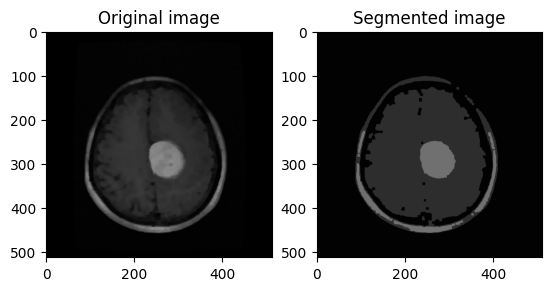

In [73]:
fig, ax = plt.subplots(ncols=2)

ax[0].imshow(img[..., ::-1])  # BGR to RGB
ax[0].set_title('Original image')

ax[1].imshow(np.uint8(kmeans_img), cmap=plt.cm.gray)
ax[1].set_title('Segmented image')

plt.show()

colormap

In [74]:
import cv2
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
#labels=img_cluster.labels_
label2D = img_cluster.reshape(br, kl) #kmeans_img img_cluster
print(label2D.shape)

(512, 512)


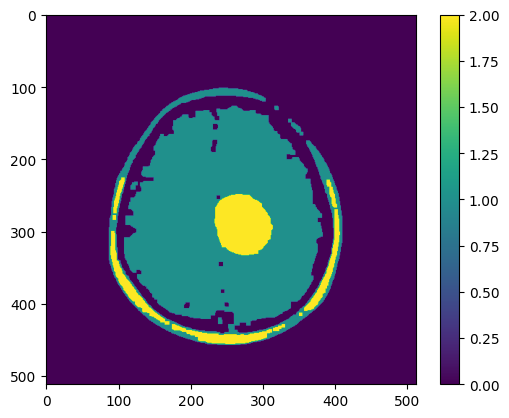

In [75]:
plt.imshow(label2D)
plt.colorbar()
plt.show()

In [76]:
import cv2
cv2.imwrite('/content/11_colormap.png',kmeans_img)

True

In [77]:
from PIL import Image

In [78]:
# fungsi citra biner
def citra_biner(nilai_ambang):

    CITRA_GRAYSCALE = Image.open('11_colormap.png').convert('L')
    PIXEL_GRAYSCALE = CITRA_GRAYSCALE.load()

    ukuran_horizontal = CITRA_GRAYSCALE.size[0]
    ukuran_vertikal = CITRA_GRAYSCALE.size[1]

    for x in range(ukuran_horizontal):
        for y in range(ukuran_vertikal):
            if PIXEL_GRAYSCALE[x, y] < nilai_ambang:
                PIXEL_GRAYSCALE[x, y] = 0
            else:
                PIXEL_GRAYSCALE[x, y] = 255

    nama_setelah_disave = 'gambar_biner_' + str(nilai_ambang) + '.png'
    CITRA_GRAYSCALE.save(nama_setelah_disave)

In [79]:
citra_biner(100)

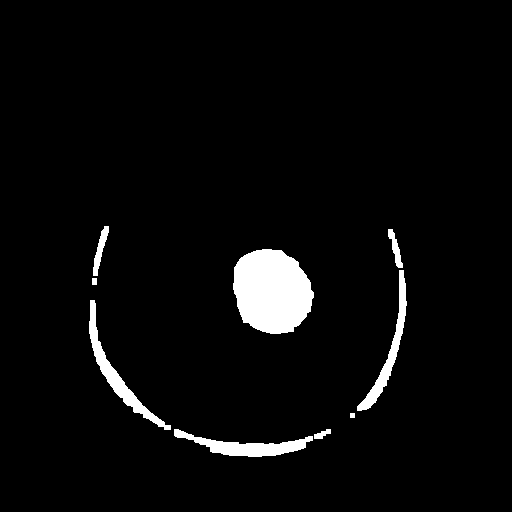

In [80]:
Image.open('gambar_biner_100.png')

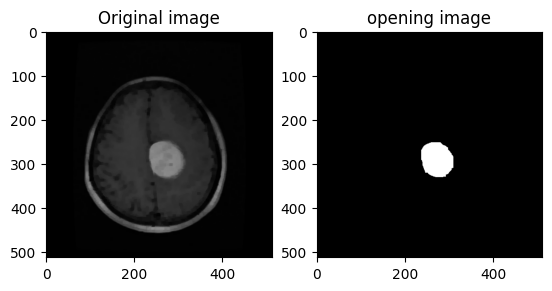

-1

In [81]:
gbr = cv2.imread("gambar_biner_100.png")
# Python program to demonstrate erosion and
# dilation of images.
import cv2
import numpy as np

# Reading the input image

# Taking a matrix of size 5 as the kernel
kernel = np.ones((5,5), np.uint8)

# The first parameter is the original image,
# kernel is the matrix with which image is
# convolved and third parameter is the number
# of iterations, which will determine how much
# you want to erode/dilate a given image.
img_erosion = cv2.erode(gbr, kernel, iterations=4)
img_dilation = cv2.dilate(img_erosion, kernel, iterations=3)

#opening= cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel, iterations=2)
#cv2.imshow('Input', img)
#cv2.imshow('Erosion', img_erosion)
#cv2.imshow('Dilation', img_dilation)

fig, ax = plt.subplots(ncols=2)

ax[0].imshow(img[..., ::-1])  # BGR to RGB
ax[0].set_title('Original image')

ax[1].imshow(img_dilation, cmap=plt.cm.gray)
ax[1].set_title('opening image')

plt.show()

cv2.waitKey(0)


In [82]:
import cv2
cv2.imwrite('/content/morf_11.png',img_dilation)

True

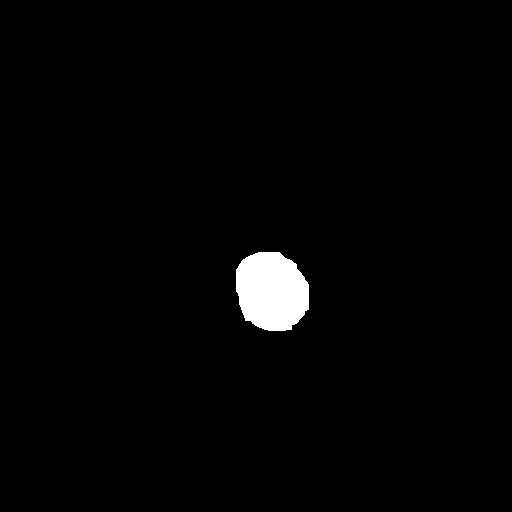

In [83]:
Image.open('morf_11.png')